# NBA球员数据分析

每个球迷心中都有自己的迈克尔乔丹。  
本此项目实践我将结合自己的兴趣爱好及学习的python知识，  
制作一份2016-2017赛季NBA常规赛基于python的数据分析报告。   

数据来源：  
感谢简书用户“牧羊的男孩”，地址如下：  
https://pan.baidu.com/s/1VjMGm9uzmeb5lnzPkGpD-Q  
以下为“牧羊的男孩”提供的数据字段解释，非常感谢！  
这里用markdown载入网络图片的形式展示：

![](https://upload-images.jianshu.io/upload_images/6857799-e501c762be529100.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

In [1]:
##载入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
#将图片在页面中展示

In [2]:
##添加隐藏代码的按钮
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

## 整体看数据结构
数据选取了2016-2017赛季342名NBA球员的球员信息、得分、篮板、助攻、薪水等39个项目，
按照得分榜降序排列，前10位的排序如下：

In [3]:
#载入数据
data=pd.read_csv('D:python/data/nba_2017_nba_players_with_salary.csv')
data.head(5)

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


我们可以看到威少、詹姆斯、小托马斯、浓眉哥、考神等耳熟能详的球星排在这份榜单的前几位。  
而此份数据提供了这300+球员的众多项比赛数据，我希望通过数据分析来发现其中的有趣的信息。

### 各列的数学描述：
从数据中看几项比较重要的信息：   
球员平均年龄为26.4岁，年龄段在19-38岁；   
球员平均年薪为730万美金，当时最大的合同为年薪3000万美金；  
球员平均出场时间为21.5分钟，某球员场均出场37.8分钟领跑联盟，当然也有只出场2.2分钟的角色球员，机会来之不易。  
类似的信息我们还能总结很多。

In [4]:
data.describe()

,Unnamed: 0,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,170.500000,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,...,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,98.871128,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,...,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,0.000000,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,85.250000,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,...,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,170.500000,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,...,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,255.750000,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,...,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,341.000000,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


In [5]:
#显示列名称
data.columns

Index(['Unnamed: 0', 'Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS',
       'TEAM', 'GP', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE', 'PACE',
       'W', 'SALARY_MILLIONS'],
      dtype='object')

### 效率值相关性分析
在众多的数据中，有一项名为“RPM”，标识球员的效率值，该数据反映球员在场时对球队比赛获胜的贡献大小，最能反映球员的综合实力。  
我们来看一下它与其他数据的相关性：

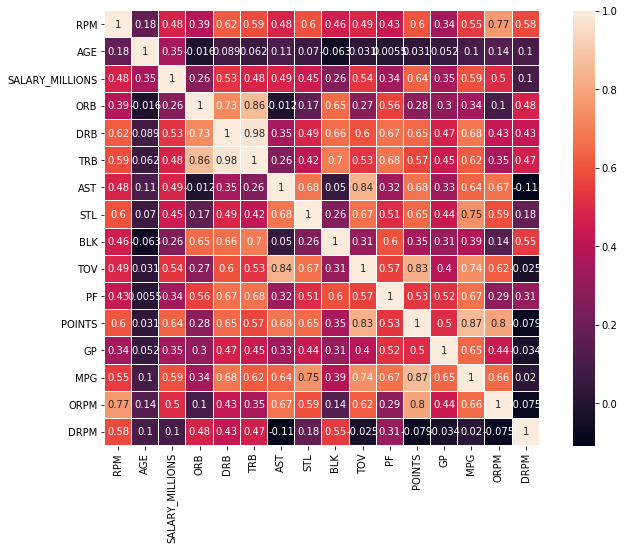

In [6]:
dat_cor=data.loc[:,['RPM','AGE','SALARY_MILLIONS','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','POINTS','GP','MPG','ORPM','DRPM']]
coor=dat_cor.corr()
plt.figure(figsize=(12,8))
sns.heatmap(coor,square=True, linewidths=0.02, annot=True) #seaborn中的heatmap函数，是将多维度数值变量按数值大小进行交叉热图展示。

由相关性分析的heatmap图可以看出，RPM值与年龄的相关性最弱，与“进攻效率值”、“场均得分”、“场均抢断数”等比赛技术数据的相关性最强。   
我在接下来的分析中将把RPM作为评价一个球员能力及状态的直观反应因素之一。

## 球员数据分析
#### 薪水 top10：

In [7]:
#薪资最高的10名运动员
data.loc[:,['PLAYER','SALARY_MILLIONS','RPM','AGE','MPG']].sort_values(by='SALARY_MILLIONS',ascending=False).head(10)

,PLAYER,SALARY_MILLIONS,RPM,AGE,MPG
6,LeBron James,30.96,8.42,32,37.8
25,Mike Conley,26.54,4.47,29,33.2
67,Al Horford,26.54,1.82,30,32.3
0,Russell Westbrook,26.50,6.27,28,34.6
1,James Harden,26.50,4.81,27,36.4
10,Kevin Durant,26.50,5.74,28,33.4
64,Dirk Nowitzki,25.00,0.26,38,26.4
19,Carmelo Anthony,24.56,0.12,32,34.3
5,Damian Lillard,24.33,3.14,26,35.9
34,Dwyane Wade,23.20,-0.91,35,29.9


勒布朗詹姆斯为该赛季薪水最高的球员，麦克康利拿到了大合同，但是在群星璀璨的薪金榜单上略显黯淡。  
同样出现在榜单的还有威少、哈登、杜兰特等球星，库里由于之前的合同太小，并没有出现在前10名里。

#### 效率值top 10:

In [8]:
#效率值最高的10名运动员
data.loc[:,['PLAYER','RPM','SALARY_MILLIONS','AGE','MPG']].sort_values(by='RPM',ascending=False).head(10)

,PLAYER,RPM,SALARY_MILLIONS,AGE,MPG
6,LeBron James,8.42,30.96,32,37.8
37,Chris Paul,7.92,22.87,31,31.5
8,Stephen Curry,7.41,12.11,28,33.4
120,Draymond Green,7.14,15.33,26,32.5
7,Kawhi Leonard,7.08,17.64,25,33.4
44,Nikola Jokic,6.73,1.36,21,27.9
12,Jimmy Butler,6.62,17.55,27,37.0
66,Rudy Gobert,6.37,2.12,24,33.9
0,Russell Westbrook,6.27,26.50,28,34.6
10,Kevin Durant,5.74,26.50,28,33.4


詹皇拿着联盟最高的薪水，打球也毫不含糊，效率值排名第一。  
保罗和库里紧随其后，在前10的榜单里，宇宙勇占据3席。  
值得一提的是，掘金队的约基奇和爵士队的戈贝尔，拿着较为微薄的工资却打出了联盟前10的效率，这也为他们接下来的大合同奠定了基础。

#### 场均出场时间 top10：

In [9]:
#出场时间最高的10名运动员
data.loc[:,['PLAYER','RPM','SALARY_MILLIONS','AGE','MPG']].sort_values(by='MPG',ascending=False).head(10)

,PLAYER,RPM,SALARY_MILLIONS,AGE,MPG
6,LeBron James,8.42,30.96,32,37.8
32,Zach LaVine,-2.97,2.24,21,37.2
14,Andrew Wiggins,-1.60,6.01,21,37.2
11,Karl-Anthony Towns,2.13,5.96,21,37.0
12,Jimmy Butler,6.62,17.55,27,37.0
17,John Wall,2.26,16.96,26,36.4
1,James Harden,4.81,26.50,27,36.4
3,Anthony Davis,4.35,22.12,23,36.1
5,Damian Lillard,3.14,24.33,26,35.9
13,Paul George,2.58,18.31,26,35.9


老詹又是独占鳌头，骑士队真实毫不浪费自己的每一分钱呐。紧随其后的是拉维涅和维金斯，不过前5名骑士差距很小。  
前10的榜单里有森林狼对的维金斯、唐斯以及随后会加盟的巴特勒（开天眼），我们预感到后狼王时代的森林狼似乎有了一丝复苏的萌芽。

### 从数据可视化的角度看数据分布

Text(0,0.5,'$AGE$')

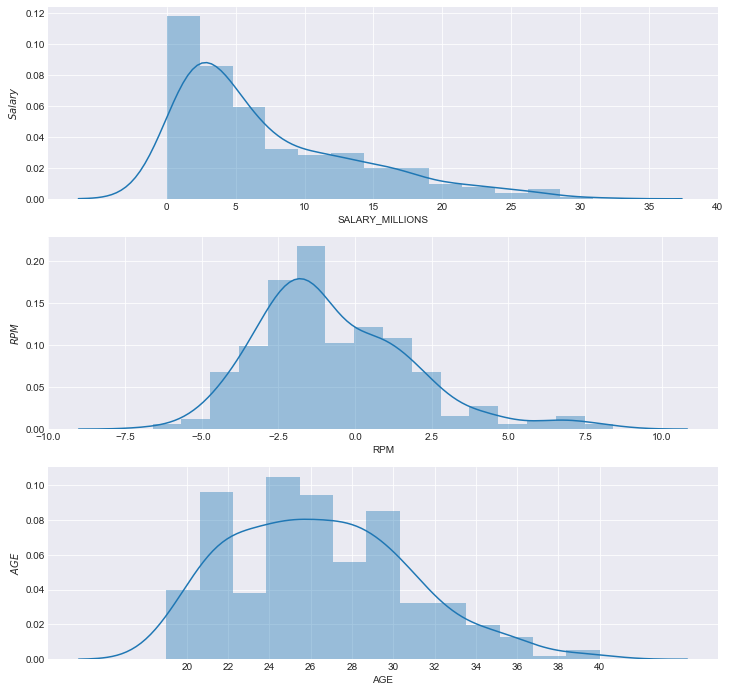

In [24]:
#分布及核密度展示
sns.set_style('darkgrid') #设置seaborn的面板风格
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)  #拆分页面，多图展示
sns.distplot(data['SALARY_MILLIONS'])
plt.xticks(np.linspace(0,40,9))
plt.ylabel(u'$Salary$',size=10)

plt.subplot(3,1,2)
sns.distplot(data['RPM'])
plt.xticks(np.linspace(-10,10,9))
plt.ylabel(u'$RPM$',size=10)

plt.subplot(3,1,3)
sns.distplot(data['AGE'])
plt.xticks(np.linspace(20,40,11))
plt.ylabel(u'$AGE$',size=10)

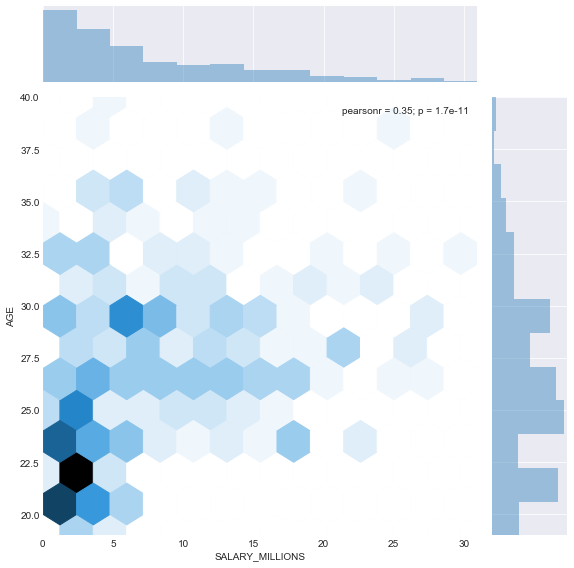

In [30]:
dat1=data.loc[:,['RPM','SALARY_MILLIONS','AGE','POINTS']]
sns.jointplot(dat1.SALARY_MILLIONS,dat1.AGE,kind='hex',size=8) 

可见年龄和效率值更符合正态分布，而球员薪水更像一个偏态分布，拿高薪的球员占据较小的比例。

## 按年龄分段数据分析
每个人都有自己最钟爱的球员，他们有的初出茅庐，有的风华正茂，有的无可奈何廉颇老矣。  
我按照年龄将球员分为3类：24岁以下、25-29岁，30岁之上，看不同年龄段的球员的数据表现有何异同。  
此处需要借助lambda函数对数据框进行加工，生成新的数据。

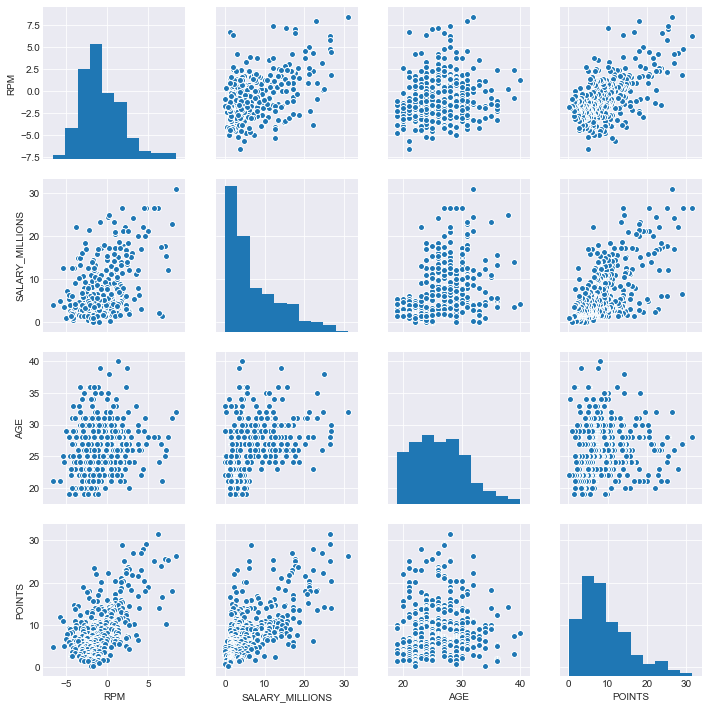

In [11]:
dat1=data.loc[:,['RPM','SALARY_MILLIONS','AGE','POINTS']]
sns.pairplot(dat1) #相关性展示，斜对角为分布展示，可以直观地看变量是否具有现行关系

In [12]:
#根据已有变量生成新的变量
data['avg_point']=data['POINTS']/data['MP'] #每分钟得分
def age_cut(df):
    if df.AGE<=24:
        return 'young'
    elif df.AGE>=30:
        return 'old'
    else:
        return 'best'
data['age_cut']=data.apply(lambda x: age_cut(x),axis=1) #球员是否处于黄金年龄
data['cnt']=1 #计数用

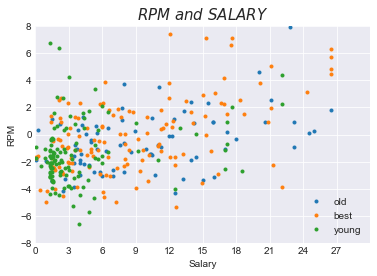

In [13]:
### 球员薪水与效率值   按年龄段来看
plt.title(u'$RPM\ and\ SALARY$',size=15)
X1=data.loc[data.age_cut=='old'].SALARY_MILLIONS
Y1=data.loc[data.age_cut=='old'].RPM
X2=data.loc[data.age_cut=='best'].SALARY_MILLIONS
Y2=data.loc[data.age_cut=='best'].RPM
X3=data.loc[data.age_cut=='young'].SALARY_MILLIONS
Y3=data.loc[data.age_cut=='young'].RPM
plt.plot(X1,Y1,'.')
plt.plot(X2,Y2,'.')
plt.plot(X3,Y3,'.')
plt.xlim(0,30)
plt.ylim(-8,8)
plt.xlabel('Salary',size=10)
plt.ylabel('RPM',size=10)
plt.xticks(np.arange(0,30,3))
plt.legend(['old','best','young'])

散点图横坐标为球员薪水，纵坐标为效率值。可以观测到：  
绝大部分的年轻球员拿着较低的薪水，数据非常集中。有两个离群点，是上文提到的戈贝尔和约基奇，两个小兄弟前途无量啊。  
黄金年龄的球员和老球员的数据相对发散，黄金年龄球员薪水与效率值正相关性更强。第一集团有几个全明星排头兵。  
老球员过了呼风唤雨的年纪，运动状态有所下滑，“高薪低效”的球员也稍微多一些。

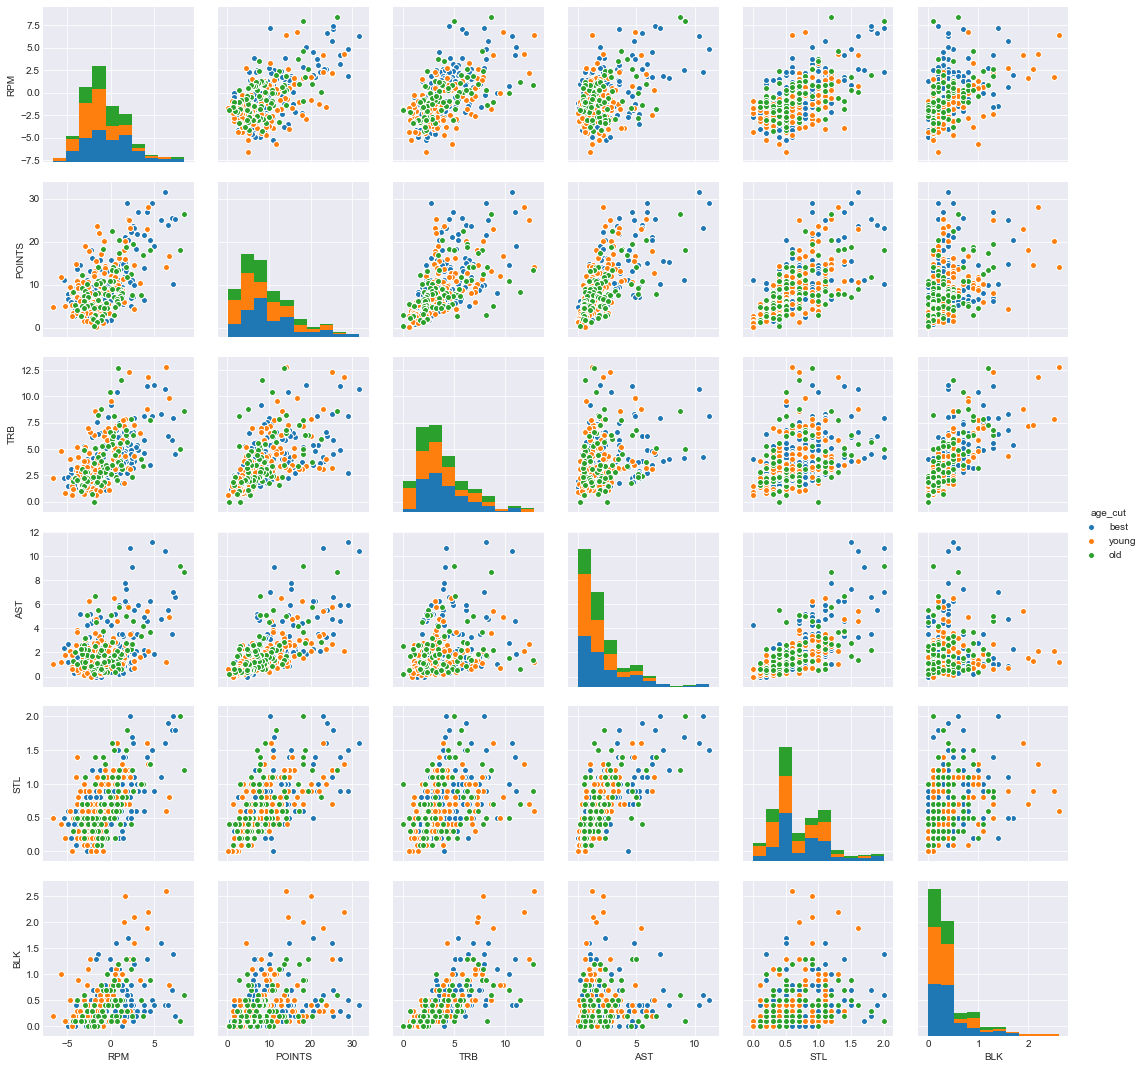

In [14]:
dat2=data.loc[:,['RPM','POINTS','TRB','AST','STL','BLK','age_cut']]
sns.pairplot(dat2,hue='age_cut')

## 球队数据分析
### 球队薪资排行
将数据按球队分组，平均薪水降序排列，看一下联盟十大土豪球队：

In [15]:
### 分组操作 按球队
dat_grp=data.groupby(by=['TEAM'],as_index=False).agg({'SALARY_MILLIONS':np.mean,'RPM':np.mean,'PLAYER':np.size})
dat_grp=dat_grp.loc[dat_grp.PLAYER>5]  #不考虑在赛季中转会的球员
dat_grp.sort_values(by='SALARY_MILLIONS',ascending=False).head(10)

,TEAM,SALARY_MILLIONS,RPM,PLAYER
9,CLE,17.095000,2.566667,6
18,GS,12.701429,3.478571,7
43,POR,9.730000,-1.260000,10
48,WSH,9.628889,-0.506667,9
39,ORL,9.490000,-2.066667,9
44,SA,9.347273,0.901818,11
26,MEM,8.705000,-0.854167,12
35,NY,8.612727,-1.182727,11
11,DAL,8.480000,-1.037143,7
24,LAC,8.266000,0.319000,10


骑士队和勇士队已超高的薪水排在这份榜单的前两名，群星璀璨的他们最终在季后赛中一路厮杀，双双闯入分区决赛。  
排在第三的开拓者有10名球员上榜，可谓后补活力充沛。球队薪金结构的健康与否对球队的发展至关重要。

### 球队年龄结构
先胖不算胖，后胖压倒炕，优质的年轻球员储备是保持球队竞争性的密匙。  
我按照分球队分年龄段，上榜球员降序排列，如上榜球员数相同，则按效率值降序排列。

In [16]:
### 分组操作 按场上位置
dat_grp2=data.groupby(by=['TEAM','age_cut'],as_index=False).agg({'SALARY_MILLIONS':np.mean,'RPM':np.mean,'PLAYER':np.size})
dat_grp2=dat_grp2.loc[dat_grp2.PLAYER>3]     ##剔除掉少量的position摇摆人
dat_grp2.sort_values(by=['PLAYER','RPM'],ascending=False).head(15)

,TEAM,age_cut,SALARY_MILLIONS,RPM,PLAYER
14,CHA,young,3.835000,-0.362500,8
9,BOS,best,7.034286,0.647143,7
105,TOR,young,4.158571,-0.555714,7
11,BOS,young,2.337143,-1.821429,7
67,MIN,best,5.560000,0.828333,6
32,DEN,young,2.181667,-0.206667,6
36,DET,best,7.638333,-0.386667,6
30,DEN,best,8.336667,-0.586667,6
63,MIL,best,9.708333,-0.625000,6
70,NO,best,6.720000,-0.738333,6


在这份榜单里，排在榜首的公牛队有年轻球员8人，但是效率值偏低，小伙子们还需努力啊。  
绿凯不得了，黄金年龄球员和年轻球员共14人，效率值较高，未来一片光明。  
年轻的森林狼有6名黄金年龄球员，老马刺有5为年长球员，一老一小效率值还都不错。  
最牛的还属宇宙勇，5名黄金年龄球员效率值为恐怖的4.7,明星在手天下我有！  

## 球队综合实力分析
最后我们来看看球队综合实力：  
按照效率值降序排列前10名球队的相关信息如下：

In [17]:
##数据可视化 按球队
dat_grp3=data.groupby(by=['TEAM'],as_index=False).agg({'SALARY_MILLIONS':np.mean,'RPM':np.mean,'PLAYER':np.size,\
                                                       'POINTS':np.mean,'eFG%':np.mean,'MPG':np.mean,'AGE':np.mean})
dat_grp3=dat_grp3.loc[dat_grp3.PLAYER>5]
dat_grp3.sort_values(by=['RPM'],ascending=False).head(10)

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
18,GS,12.701429,3.478571,7,14.528571,0.575143,26.700000,28.714286
9,CLE,17.095000,2.566667,6,15.883333,0.555833,29.766667,28.000000
44,SA,9.347273,0.901818,11,9.818182,0.524182,21.472727,29.545455
24,LAC,8.266000,0.319000,10,8.740000,0.462800,18.700000,28.600000
38,OKC,8.060000,0.255556,9,10.677778,0.518111,22.566667,25.666667
47,UTAH,6.471667,-0.107500,12,10.233333,0.515917,24.008333,26.666667
6,CHA,6.779231,-0.277692,13,8.700000,0.447923,20.884615,25.076923
46,TOR,5.668000,-0.319000,10,5.800000,0.497800,17.170000,24.200000
31,NO,8.044444,-0.327778,9,9.411111,0.523222,24.322222,27.444444
5,BOS,6.142667,-0.426667,15,8.426667,0.565067,18.886667,24.666667


勇士和其实占据前两名的位置，cross check了效率值反映球队实力的事实。  
老马刺排名第三，平均年龄达29.5岁排名第一，更新血液迫在眉睫。
我所钟爱的雷霆由于大威少的存在能排在第5位，各项数据中规中矩。

### 利用箱线图看着10支球队的相关数据

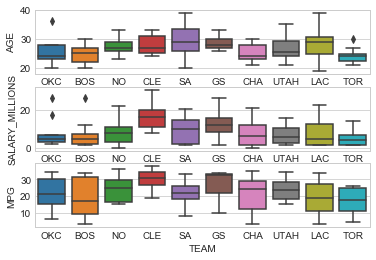

In [18]:
sns.set_style('whitegrid')
dat_grp4=data[data['TEAM'].isin(['GS','CLE','SA','LAC','OKC','UTAH','CHA','TOR','NO','BOS'])]
plt.subplot(3,1,1)
sns.boxplot(x='TEAM',y='AGE',data=dat_grp4)
plt.subplot(3,1,2)
sns.boxplot(x='TEAM',y='SALARY_MILLIONS',data=dat_grp4)
plt.subplot(3,1,3)
sns.boxplot(x='TEAM',y='MPG',data=dat_grp4)

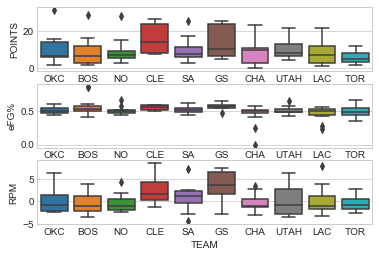

In [19]:
plt.subplot(3,1,1)
sns.boxplot(x='TEAM',y='POINTS',data=dat_grp4)
plt.subplot(3,1,2)
sns.boxplot(x='TEAM',y='eFG%',data=dat_grp4)
plt.subplot(3,1,3)
sns.boxplot(x='TEAM',y='RPM',data=dat_grp4)

从年龄结构看，老马刺年龄跨度最大，年龄中位数最高。猛龙队最年轻且年龄跨度最小，后劲十足。   
从球队薪金看，勇士和骑士最高，俄村雷霆在失去杜兰特后栽了大跟头，薪金健康情况堪忧。  
从出场时间看，骑士队最高且跨度低，小团体战斗能力出众。  
从得分来看，骑士和勇士整体出众。雷霆的威少、绿军的小托马斯、醍醐的浓眉哥以及马刺的伦纳德均是各队的离群点，双拳难敌四手。  
从命中率看，命中率各队非常集中，绿凯的小托马刺作为地表最强175远远高于其他人。  
从效率值看，骑士和勇士是大赢家。各个队的离群点我们甚至不用通过具体的查询就可以猜到是哪位球员。

抖个机灵，马刺作为老牌劲旅，居然有一个球员效率值为负离群点，查一下他是谁：

In [20]:
data.loc[data.TEAM=='SA'].sort_values(by='RPM',ascending=True).head(3)

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,avg_point,age_cut,cnt
311,311,424,Bryn Forbes,SG,23,7.9,1.0,2.8,0.364,0.5,...,-1.62,-4.40,-0.22,4.8,95.86,24,1.31,0.329114,young,1
292,292,388,Dejounte Murray,PG,20,8.5,1.3,3.1,0.431,0.2,...,-0.83,-2.80,0.07,7.5,96.05,29,1.31,0.400000,young,1
125,125,147,Tony Parker,PG,34,25.2,4.2,9.0,0.466,0.4,...,-0.97,-1.66,1.42,9.3,93.94,46,14.45,0.400794,old,1


福布斯这个23岁的小伙子出现在了这个尴尬的位置，要好好加油了！

### 结语  
一年一度的NBA比赛即将落下帷幕，而随着科技的进步我们可以更好的对篮球比赛的数据进行记录和分析，    
这使得我们能更好地理解篮球，理解球员，结合我们的专业知识和兴趣爱好，更好地享受篮球比赛的无穷魅力。